## Overview

I recently completed the [Udacity Deep Learning Nanodegree](https://www.udacity.com/course/deep-learning-nanodegree--nd101) which focuses on implementing a variety of deep learning architectures using [PyTorch](https://pytorch.org/). At the outset it's pretty fundamental to understand the data structures you'll be encountering as inputs and outputs - this tutorial aims to cover all those basics, but <i>does</i> assume a good level of prior Python knowledge and a smattering of linear algebra. I hope it may help you to get up and running quickly!

## First things first... structures in Python and Numpy
Just a quick reminder: these are the 4 types of structures we'll be encountering:
<img src='data_structures.png' width='80%' /><p>
Let's take a look how these work in Numpy which you should be more accustomed to, (and then we'll move onto PyTorch, as well as how to go back and forth between these two worlds).

In [1]:
import numpy as np

### Scalars
Scalars have 0 dimensions and are essentially just single numbers:<p>
    <b>1, 3.4, 19, etc.</b>

In [2]:
# If you want to create a NumPy array that holds a scalar
# pass the value to NumPy's array function, like so:
s = np.array(5)
print('Output: ', s)
print('Shape: ', s.shape)
print('Type: ', type(s))
# Notice how the shape has 0 dimensions!

Output:  5
Shape:  ()
Type:  <class 'numpy.ndarray'>


In [3]:
# Even though scalars are inside arrays, you can still use them like a normal scalar or single number. So you could 
# quite feasibly add a scalar and an integer - but notice the output is an integer, and no longer an array:
x = s + 3
print('Output: ', x)
print('Shape: ', x.shape)
print('Type: ', type(x))
# It's important to always be aware of input types and resulting output types!

Output:  8
Shape:  ()
Type:  <class 'numpy.int64'>


### Vectors
Vectors have 1 dimension and are essentially lists of numbers:<p>
Row vector (aka 1 x 3 matrix):<br>
    <b>1 2 3</b><p>
Column vector (aka 3 x 1 matrix):<br>
    <b>1<br>
    2<br>
    3</b><br>

In [4]:
# To create a vector, you'd pass a Python list to the array function, like this:
v = np.array([1,2,3])
print('Output: ', v)
print('Shape: ', v.shape)
print('Type: ', type(v))

Output:  [1 2 3]
Shape:  (3,)
Type:  <class 'numpy.ndarray'>


In [5]:
# You can access an element within the vector using indices, like this:
x = v[1]
print(x)

2


In [6]:
# NumPy also supports slicing, negative indexation, etc. just like you'd expect it to:
print(v[1:])
print(v[-1])

[2 3]
3


### Matrices
Matrices have 2 dimensions and essentially form a grid of values:<p>
    <b>1 2 3<br>
       4 5 6<br>
       7 8 9</b>


In [7]:
# You create matrices using NumPy's array function, just as you did for vectors. 
# However, instead of just passing in a list, you need to supply a list of lists, 
# where each list represents a *row*:
m = np.array([[1,2,3], [4,5,6], [7,8,9]])
print('Output: \n', m)
print('Shape: ', m.shape)
print('Type: ', type(m))

Output: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Shape:  (3, 3)
Type:  <class 'numpy.ndarray'>


In [8]:
# Access elements via their indices - note unlike Excel (yes I DO still use Excel!), indices go [row][column]
m[1][2]

6

### Tensors
Tensors can have n dimensions, so they'll often get harder to visualize mentally! A typical example might be a tensor for an image which will have a grid of pixels by 3 RGB color channels.

In [9]:
# To create a 3x3x2x1 tensor, you could do the following:
t = np.array([[[[1],[2]],[[3],[4]],[[5],[6]]],[[[7],[8]],\
    [[9],[10]],[[11],[12]]],[[[13],[14]],[[15],[16]],[[17],[17]]]])
print('Output: \n', t)
print('Shape: ', t.shape)
print('Type: ', type(t))

Output: 
 [[[[ 1]
   [ 2]]

  [[ 3]
   [ 4]]

  [[ 5]
   [ 6]]]


 [[[ 7]
   [ 8]]

  [[ 9]
   [10]]

  [[11]
   [12]]]


 [[[13]
   [14]]

  [[15]
   [16]]

  [[17]
   [17]]]]
Shape:  (3, 3, 2, 1)
Type:  <class 'numpy.ndarray'>


Note that you read the shape from the outside in: so this tensor has 3 outer groupings, each of which has 3 groupings itself, each of which contains a group of 2 items, each of which is made up of 1 item.<p>
<img src='tensor_shape_2.png' width='30%' /><p>

In [10]:
# You can access items just like with matrices, but with more indices - read from the outside in as described above
t[2][1][1][0]

16

### Changing shapes
Sometimes you'll need to change the shape of your data without actually changing its contents. For example, you may have a vector, which is one-dimensional, but need a matrix, which is two-dimensional.

In [11]:
# Let's take a row vector
v = np.array([1,2,3,4])
print('Output: \n', v)
print('Shape: ', v.shape)
print('Type: ', type(v))

Output: 
 [1 2 3 4]
Shape:  (4,)
Type:  <class 'numpy.ndarray'>


In [12]:
# You can transform this to a 1 x 4 matrix
x = v.reshape(1,4)
print('Output: \n', x)
print('Shape: ', x.shape)
print('Type: ', type(x))

Output: 
 [[1 2 3 4]]
Shape:  (1, 4)
Type:  <class 'numpy.ndarray'>


In [13]:
# Or even to a 4 x 1 matrix!
x = v.reshape(4,1)
print('Output: \n', x)
print('Shape: ', x.shape)
print('Type: ', type(x))

Output: 
 [[1]
 [2]
 [3]
 [4]]
Shape:  (4, 1)
Type:  <class 'numpy.ndarray'>


In [14]:
# Instead of reshape you may see variants like this:
x = v[None, :]
print('Output: \n', x)
print('Shape: ', x.shape)
print('Type: ', type(x))
x = v[:, None]
print('Output: \n', x)
print('Shape: ', x.shape)
print('Type: ', type(x))
# For clarity I must say I prefer np.reshape()!

Output: 
 [[1 2 3 4]]
Shape:  (1, 4)
Type:  <class 'numpy.ndarray'>
Output: 
 [[1]
 [2]
 [3]
 [4]]
Shape:  (4, 1)
Type:  <class 'numpy.ndarray'>


### Creating empty structures
You may sometimes want to create an 'empty' array of the right shape, ready to feed data into - this is quite easy to do with np.zeros(). You'll usually populate it with data later on by referring to each location by its index - so again it will be important to have a clear picture of what each level represents:

In [15]:
empty_matrix = np.zeros(shape = (3, 4))
empty_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
empty_tensor = np.zeros(shape = (3, 4, 2))
empty_tensor

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

### In the real world... some practical examples

#### Natural language processing - vectors of words
When working with words, we'll typically be dealing with vectors, for example, if we have the following sentence:<p>
&nbsp;&nbsp;&nbsp;&nbsp;<i>I went on a wonderful holiday with a friend to see the sea and I had a marvellous time</i><p>
We might convert it into a sequence of numbers, and then represent the words in the sentence as follows:<p>
&nbsp;&nbsp;&nbsp;&nbsp;<i>[0, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 0, 11, 1, 12, 13]</i><p>
That process will typically work something like this:

In [17]:
# We have a sentence which is just a string of words:
my_sentence = 'I went on a wonderful holiday with a friend to see the sea and I had a marvellous time'
print(my_sentence)

I went on a wonderful holiday with a friend to see the sea and I had a marvellous time


In [18]:
# We split those words so each word becomes a separate item in a list:
word_list = my_sentence.lower().split(' ')
print(word_list)

['i', 'went', 'on', 'a', 'wonderful', 'holiday', 'with', 'a', 'friend', 'to', 'see', 'the', 'sea', 'and', 'i', 'had', 'a', 'marvellous', 'time']


In [19]:
# We use some method to get all the words in the vocab and turn them into numbers
# Here we use Counter to get a list of unique words and then number them based on frequency
# Notice how 'a' occurs most frequently so it becomes item 0, 
# then 'i' occurs next most frequently so it becomes item 1 and so on
from collections import Counter
counts = Counter(word_list)
vocab = sorted(counts, key=counts.get, reverse=True)
word2idx = {w: idx for (idx, w) in enumerate(vocab)}
word2idx

{'a': 0,
 'i': 1,
 'went': 2,
 'on': 3,
 'wonderful': 4,
 'holiday': 5,
 'with': 6,
 'friend': 7,
 'to': 8,
 'see': 9,
 'the': 10,
 'sea': 11,
 'and': 12,
 'had': 13,
 'marvellous': 14,
 'time': 15}

In [20]:
# And then we turn the word list into a vector
my_sentence_numeric = np.array([word2idx[word] for word in word_list])
print('Output: \n', my_sentence_numeric)
print('Shape: ', my_sentence_numeric.shape)
print('Type: ', type(my_sentence_numeric))

Output: 
 [ 1  2  3  0  4  5  6  0  7  8  9 10 11 12  1 13  0 14 15]
Shape:  (19,)
Type:  <class 'numpy.ndarray'>


#### Black & white images - matrices
Black and white images will often be represented as matrices - each pixel in the image has a location in terms of height and width (the 2 dimensions of our matrix) but there is only one colour channel: representing shades of grey between pure black and pure white.<p>
The MNIST images are the most typical toy examples that you'll come across - here we see a sample '5':
<img src='img_5.png' width='10%' /><p>
Here's how a typical image import happens:

In [21]:
# One way to work with image data is using matplotlib:
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
# We can use the imread() function to import the above 'png' file - 
# and hey presto! it's just another array of numbers!
img_5_plt = plt.imread('img_5.png')
print('Shape: ', img_5_plt.shape)
print('Type: ', type(img_5_plt))
print('Min and max values: {} and {}'.format(img_5_plt.min(), img_5_plt.max()))
# Notice that it's an array with 2 dimensions, i.e. a matrix

Shape:  (280, 280)
Type:  <class 'numpy.ndarray'>
Min and max values: 0.003921568859368563 and 1.0


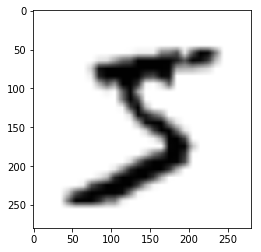

In [23]:
# We can plot our number as follows:
plt.imshow(img_5_plt, cmap='binary_r')
# Note plt.imshow() assumes an RGB colour channel which is why we need to tell it what colormap to use
# for our black and white only scenario (you can try running this cell again without the cmap parameter
# to see what I mean!)

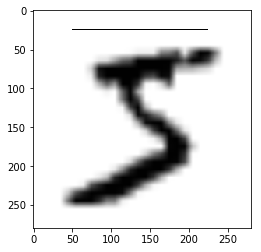

In [24]:
# Each pixel's location can be expressed by referencing our array - this is easiest seen by 
# 'drawing a line' across our number, i.e. changing the value of some white pixels to black:
img_5_plt[25][50:225] = 0.01
plt.imshow(img_5_plt, cmap='binary_r')

#### Colour images - tensors representing RGB colour channels
Colour images are usually represented as tensors - each pixel in the image has a location in terms of height and width AND the colour channel it belongs to (R, G, and B)<p>
Here is a small sea picture from my holiday:
<img src='sea_picture.jpg' width='20%' /><p>

In [25]:
# Let's read that image in - again just and array, but with more dimensions:
image_sea_plt = plt.imread('sea_picture.jpg')
print('Shape: ', image_sea_plt.shape)
print('Type: ', type(image_sea_plt))
print('Min and max values: {} and {}'.format(image_sea_plt.min(), image_sea_plt.max()))
# Notice that it's an array with 3 dimensions, i.e. a tensor

Shape:  (256, 256, 3)
Type:  <class 'numpy.ndarray'>
Min and max values: 0 and 249


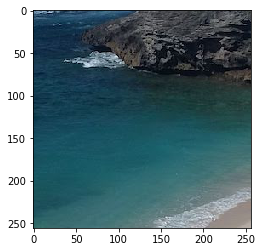

In [26]:
# Because this is a regular RGB image we can plot it with plt.imshow() and no additional parameters:
plt.imshow(image_sea_plt)

In [27]:
# And we can view the values at a specific point using indexation or slicing as we've come to expect:
image_sea_plt[0][0][0]

2

In [28]:
# We could equally well have used OpenCV to read in the image - the results are the same, again an array:
import cv2
image_sea_cv = cv2.imread('sea_picture.jpg')
print('Shape: ', image_sea_cv.shape)
print('Type: ', type(image_sea_cv))
print('Min and max values: {} and {}'.format(image_sea_cv.min(), image_sea_cv.max()))

Shape:  (256, 256, 3)
Type:  <class 'numpy.ndarray'>
Min and max values: 0 and 249


#### Flattening image arrays - re-shaping in action
With deep learning we'll usually 'flatten' a matrix or tensor before doing a forward pass through the network - so we'd want to take a multi-dimensional thing (matrix or tensor), and turn it into a one-dimensional vector like, a bit like this:
<img src='flattening.png' width='50%' /><p>

In [29]:
# Let's remind ourselves of the shape of our sample MNIST '5':
print(img_5_plt.shape)

(280, 280)


In [30]:
# And now we can flatten it - note the '-1' notation is a nifty way of saying 
# 'just fit the other dimensions in' so it works out that the vector length is 
# 78400 in this case (280 x 280)
img_5_flattened = img_5_plt.reshape(1,-1)
print(img_5_flattened.shape)

(1, 78400)


In [31]:
# Let's remind ourselves of the shape of my holiday sea picture:
print(image_sea_plt.shape)

(256, 256, 3)


In [32]:
# And now we can flatten it - note the '-1' notation is a nifty way of saying 
# 'just fit the other dimensions in' so it works out that the vector length is 
# 196608 in this case (256 x 256 x 3)
image_sea_flattened = image_sea_plt.reshape(1, -1)
print(image_sea_flattened.shape)

(1, 196608)


## Element-wise operations
Here's how we perform math functions on matrices (or vectors or tensors).

In [33]:
# Let's setup our initial matrix
m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [34]:
# Adding a number to the matrix adds that number to each element within the matrix
2 + m

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [35]:
# Same with dividing by a number
m/2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ],
       [3.5, 4. , 4.5]])

In [36]:
# What about adding 2 matrices? Take each number at the corresponding index and add it, so 1 + 1, 2 + 2, etc.
# Because the operations are done index by index the matrices have to be the same shape!
m + m

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [37]:
# What about multiplying 2 matrices? Same principle applies:
m * m

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [38]:
# What if you have your matrix already and you want to re-use it by setting the contents to 0? Multiply by 0!
m *= 0
print(m)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


## Dot product
Let's take the example of 2 vectors:<br>
[9, 2, 4, 16] . [1, 7, 13, 0]<p>
To find the dot product we'll perform element-wise multiplication and then add the results to produce a single number, i.e. <br>
the sum of : 9 x 1, 2 x 7, 4 x 13, 16 x 0 = 75<p>
Note we always need 2 vectors of <i>equal length</i>.

In [39]:
v1 = np.array([9, 2, 4, 16])
v2 = np.array([1, 7, 13, 0])
v1@v2

75

## Matrix product
Take a series of dot products between every <b>ROW</b> in the left matrix and every <b>COLUMN</b> in the right matrix. Note that because we'll be taking the dot product for rows by columns, the number of columns in the first matrix needs to be the same length as the number of rows in the second matrix - in this case 4. Check the shapes of the first and the second: if the inner numbers are the same you can go ahead and multiply!

In [40]:
# Let's setup our matrices and check their shapes
m1 = np.array([[9, 2, 4, 16], [8, 10, 12, 14]])
m2 = np.array([[1, 3, 5], [7, 9, 11], [13, 15, 17], [0, 21, 23]])
print('Output: \n', m1)
print('Output: \n', m2)
print('Shapes: ', m1.shape, m2.shape)

Output: 
 [[ 9  2  4 16]
 [ 8 10 12 14]]
Output: 
 [[ 1  3  5]
 [ 7  9 11]
 [13 15 17]
 [ 0 21 23]]
Shapes:  (2, 4) (4, 3)


In [41]:
# And now we do matrix multiplications
m1@m2

array([[ 75, 441, 503],
       [234, 588, 676]])

In [42]:
checking = m1@m2
checking.shape

(2, 3)

In [43]:
# How does shape affect the answer? Scenario 1
m1a = np.array([[1, 3, 5], [7, 9, 11]])
m1b = np.array([[0, 6], [2, 8], [4, 10]])
print(m1a)
print(m1b)
print('Shapes: ', m1a.shape, m1b.shape)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  6]
 [ 2  8]
 [ 4 10]]
Shapes:  (2, 3) (3, 2)


In [44]:
# Notice how when we multiply them together the resulting answer has
# the same number of rows as our first matrix and the same number of 
# columns as our second matrix
answer1 = m1a@m1b
print(answer1)
print('Shape: ', answer1.shape)

[[ 26  80]
 [ 62 224]]
Shape:  (2, 2)


In [45]:
# How does shape affect the answer? Scenario 2 - essentially the same but shaped differently
m2a = np.array([[1, 7], [3, 9], [5, 1]])
m2b = np.array([[0, 2, 4], [6, 8, 10]])
print(m2a)
print(m2b)
print('Shapes: ', m2a.shape, m2b.shape)

[[1 7]
 [3 9]
 [5 1]]
[[ 0  2  4]
 [ 6  8 10]]
Shapes:  (3, 2) (2, 3)


In [46]:
# Notice how when we multiply them together the resulting answer has
# the same number of rows as our first matrix and the same number of 
# columns as our second matrix
answer2 = m2a@m2b
print(answer2)
print('Shape: ', answer2.shape)

[[ 42  58  74]
 [ 54  78 102]
 [  6  18  30]]
Shape:  (3, 3)


So multiplying a 10000 x 300 matrix by another 300 x 600 matrix will give you a 10000 x 6000 matrix.<br>
Where multiplying a 300 x 600 matrix by another 300 x 10000 matrix will give you a 6000 x 10000 matrix.<br>
So unlike standard multiplication, matrix multiplication is NOT commutative, i.2. A.B != B.A.<br>
Data in the left matrix should be arranged as rows, while data in the right matrix should be arranged as columns.<br>
<img src='multiplication.png' width='50%' /><p>

In [47]:
# An alternative method is to use the matmul function
answer2 = np.matmul(m2a, m2b)
print(answer2)

[[ 42  58  74]
 [ 54  78 102]
 [  6  18  30]]


In [48]:
# You may also see the dot function but be careful as this is only really good for 2 dimensions
answer2 = np.dot(m2a, m2b)
print(answer2)

[[ 42  58  74]
 [ 54  78 102]
 [  6  18  30]]


## Matrix transpose
This is where the values of the <b>ROWS</b> in the original matrix become the values of the <b>COLUMNS</b> in the transposed matrix.<p>
This can be useful, e.g. in a situation where you need to perform matrix multiplication but the shapes of your matrices are incompatible. But this is a situation just like you'd have in Excel: if you're storing data in rows or columns it's going to make a difference what you shuffle about!<p>
If both of the original matrices store their data as ROWS it's safe to use a transpose<p>

In [49]:
# Remember our last matrix? Here it is again:
answer2

array([[ 42,  58,  74],
       [ 54,  78, 102],
       [  6,  18,  30]])

In [50]:
# Now compare the results once it's transposed - the values from ROW 0 have become the values for COLUMN 0
answer2.transpose()

array([[ 42,  54,   6],
       [ 58,  78,  18],
       [ 74, 102,  30]])

In [51]:
# Practically lots of people use .T because it's so much shorter to type
answer2.T

array([[ 42,  54,   6],
       [ 58,  78,  18],
       [ 74, 102,  30]])

In [52]:
# Be careful because even though you create a 'new' variable from one of these 
# it still references the original variable - notice how BOTH are updated to 400
answer_t = answer2.T
answer_t[2][2] = 400
print(answer_t)
print(answer2)

[[ 42  54   6]
 [ 58  78  18]
 [ 74 102 400]]
[[ 42  58  74]
 [ 54  78 102]
 [  6  18 400]]


## A transpose use case

In [53]:
# We have a bunch of inputs, note the shape 1 x 4
inputs = np.array([[-0.27,  0.45,  0.64, 0.31]])
print(inputs)
print('Shape: ', inputs.shape)

[[-0.27  0.45  0.64  0.31]]
Shape:  (1, 4)


In [54]:
# And a bunch of weights, note the incompatible shape 3 x 4
weights = np.array([[0.02, 0.001, -0.03, 0.036], \
    [0.04, -0.003, 0.025, 0.009], [0.012, -0.045, 0.28, -0.067]])
print(weights)
print('Shape: ', weights.shape)

[[ 0.02   0.001 -0.03   0.036]
 [ 0.04  -0.003  0.025  0.009]
 [ 0.012 -0.045  0.28  -0.067]]
Shape:  (3, 4)


Remember that to multiply successfully we need the number of <b>ROWS</b> in the first matrix to equal the number of <b>COLUMNS</b> in the second matrix. In this case we need the shape of our second matrix to be (4, 3) and not (3, 4).

In [55]:
# By transposing the weights we can multiply the 2 together
updated_values = np.matmul(inputs, weights.T)
print(updated_values)
print('Shape: ', updated_values.shape)

[[-0.01299  0.00664  0.13494]]
Shape:  (1, 3)


In [56]:
# Similarly by transposing the inputs we can ALSO multiply the 2 together
updated_values2 = np.matmul(weights, inputs.T)
print(updated_values2)
print('Shape: ', updated_values2.shape)

[[-0.01299]
 [ 0.00664]
 [ 0.13494]]
Shape:  (3, 1)


In [57]:
# Notice how the answers are just transposes of each other, so which one you use 
# really just depends on the shape you want for the output.

#### Special case with 1D vectors
It's possible to get the transpose of an array like so arr.T, but for a 1D array, the transpose will return a row vector. Instead, use arr[:,None] to create a column vector:

In [58]:
# Let's create a 1D vector for illustration purposes
vec_1d = np.array([3, 6, 9])
vec_1d.shape

(3,)

In [59]:
# Notice how transposing it makes no difference!
print(vec_1d)
print(vec_1d.transpose())

[3 6 9]
[3 6 9]


In [60]:
# But this will work nicely, basically saying all of the elements from the vector and None for the second column
vec_1d[:,None]

array([[3],
       [6],
       [9]])

In [61]:
# OR create the original 1D vector with TWO dimensions in the first place (quicker than reshaping after):
vec_2d = np.array([3, 6, 9], ndmin = 2)
print(vec_2d)
print(vec_2d.T)

[[3 6 9]]
[[3]
 [6]
 [9]]


### Coding a very simple forward pass
A forward pass is just matrix multiplication in action:
<img src='weight_matrix_detail_2.png' width='85%' /><p>
Notice how the weight matrix has been constructed, where the number of rows is the same as the number of features in x, and the number of columns is the same as the number of hidden nodes in h:<p>

In [62]:
# features is 2D array containing the input data x1, x2, x3
features = np.array([3, 6, 9]).reshape(1,3)
print(features)
print(features.shape)

[[3 6 9]]
(1, 3)


In [63]:
# Number of records and input units
n_records, n_inputs = features.shape
print(n_records)
print(n_inputs)

1
3


In [64]:
# Set number of hidden units to 2
n_hidden = 2
# Generate random weights to fit our mini architecture
weights_input_to_hidden = np.random.normal(0, n_inputs**-0.5, size=(n_inputs, n_hidden))
print(weights_input_to_hidden)

[[-0.80314015  0.51174729]
 [ 0.93638071 -0.1819504 ]
 [ 0.82375177 -0.07644257]]


In [65]:
# If we now check the shapes, we are ready to multiply!
print(features.shape)
print(weights_input_to_hidden.shape)

(1, 3)
(3, 2)


In [66]:
# Here we go
hidden_inputs = np.dot(features, weights_input_to_hidden)
print(hidden_inputs)
print(hidden_inputs.shape)

[[10.62262974 -0.24444369]]
(1, 2)


In [67]:
# Let's look at the transposed features
print(features.transpose())
print(features.transpose().shape)

[[3]
 [6]
 [9]]
(3, 1)


In [68]:
# And the transposed random weights
print(weights_input_to_hidden.transpose())
print(weights_input_to_hidden.transpose().shape)

[[-0.80314015  0.93638071  0.82375177]
 [ 0.51174729 -0.1819504  -0.07644257]]
(2, 3)


In [69]:
# So we could also just multiply as follows (note how we have to swap 
# the weights and the features to line up the shapes:
transposed_hidden_inputs = np.dot(weights_input_to_hidden.transpose(), features.transpose())
print(transposed_hidden_inputs)
print(transposed_hidden_inputs.shape)

[[10.62262974]
 [-0.24444369]]
(2, 1)


Clearly, the important thing when setting this up in practice is to know what is represented by the rows versus the columns, what shape the outputs are and what those represent, and so on!

## Now let's move on... structures in PyTorch
Scalars, vectors, matrices and tensors are all used, but instead of the NumPy array, they are held in the PyTorch tensor.

In [70]:
import torch

In [71]:
# Here we are creating a 1 x 5 tensor filled with random values
my_tensor_1 = torch.randn((1, 5))
my_tensor_1

tensor([[-0.2077, -1.1962, -2.3296,  0.1182, -0.6795]])

In [72]:
# We can create tensors of many dimensions!
my_4D_tensor = torch.randn((2, 3, 2, 3))
my_4D_tensor

tensor([[[[ 0.8850, -0.8992, -1.4532],
          [-0.3825,  0.0726, -0.6434]],

         [[ 0.2978,  0.6723, -0.7668],
          [-0.4401,  0.8991,  0.9226]],

         [[-0.2236, -0.7165, -0.2679],
          [-1.0320, -0.5938,  0.8750]]],


        [[[ 0.9508, -1.9034, -0.5138],
          [-1.1421, -1.5693,  1.1334]],

         [[-0.0899,  1.3160,  0.5830],
          [-0.7927, -1.0147, -1.6163]],

         [[ 0.5218,  1.6359,  0.5626],
          [-0.8350, -0.6344, -0.4213]]]])

In [73]:
# We can also create a second random tensor *with the same shape* as the first...
my_tensor_2 = torch.randn_like(my_tensor_1)
my_tensor_2

tensor([[ 1.3532,  0.8760,  0.3802,  0.8343, -0.3119]])

In [74]:
# With matrix multiplication and just working with matrices in general we may need to re-shape, 
# in fact there are many circumstances where you'll want to do this!

# Method 1 - RESHAPE - basically returns a new tensor
my_reshape_tensor_1 = my_tensor_1.reshape(5, 1)
print(my_reshape_tensor_1)

# Method 2 - RESIZE - returns same tensor with a different shape
my_reshape_tensor_2 = my_reshape_tensor_1.resize_(5, 1)
print(my_reshape_tensor_2)

# Method 3 - VIEW - also returns a new tensor, quite frequently seen
my_reshape_tensor_3 = my_reshape_tensor_1.view(5, 1)
print(my_reshape_tensor_3)

tensor([[-0.2077],
        [-1.1962],
        [-2.3296],
        [ 0.1182],
        [-0.6795]])
tensor([[-0.2077],
        [-1.1962],
        [-2.3296],
        [ 0.1182],
        [-0.6795]])
tensor([[-0.2077],
        [-1.1962],
        [-2.3296],
        [ 0.1182],
        [-0.6795]])


In [75]:
# Just as we did in NumPy we can use -1 as an indicator to re-shape to the required
# remaining number in the shape for everything to 'balance' - check out these variations:
my_tensor_3 = torch.randn((4, 3))
print(my_tensor_3)
print(my_tensor_3.view(3, -1))
print(my_tensor_3.view(1, -1))

tensor([[ 0.8118,  0.3068, -0.9181],
        [ 0.7558, -0.8581, -1.0108],
        [-0.4357, -0.8279, -0.5920],
        [ 1.1929, -0.0802, -0.0894]])
tensor([[ 0.8118,  0.3068, -0.9181,  0.7558],
        [-0.8581, -1.0108, -0.4357, -0.8279],
        [-0.5920,  1.1929, -0.0802, -0.0894]])
tensor([[ 0.8118,  0.3068, -0.9181,  0.7558, -0.8581, -1.0108, -0.4357, -0.8279,
         -0.5920,  1.1929, -0.0802, -0.0894]])


In [76]:
# We can also re-shape one tensor to be *like the shape of another tensor - just like so:
my_tensor_4 = torch.randn(3, 4)
my_tensor_3.view(*my_tensor_4.shape)
# Obviously the shapes of the from and to tensors have to be compatible so all the values
# still 'fit in' as they should

tensor([[ 0.8118,  0.3068, -0.9181,  0.7558],
        [-0.8581, -1.0108, -0.4357, -0.8279],
        [-0.5920,  1.1929, -0.0802, -0.0894]])

In [77]:
# There's another function we'll use quite often in PyTorch which is .topk(). By default topk() is going 
# to find the top value per row, so the following says 'give me the top 2 values per row', and we
# see we get values in the first tensor AND the indices of those values in the second tensor
print(my_tensor_3)
print(my_tensor_3.topk(2))
# Notice that it's returned the top 2 values per ROW

tensor([[ 0.8118,  0.3068, -0.9181],
        [ 0.7558, -0.8581, -1.0108],
        [-0.4357, -0.8279, -0.5920],
        [ 1.1929, -0.0802, -0.0894]])
torch.return_types.topk(
values=tensor([[ 0.8118,  0.3068],
        [ 0.7558, -0.8581],
        [-0.4357, -0.5920],
        [ 1.1929, -0.0802]]),
indices=tensor([[0, 1],
        [0, 1],
        [0, 2],
        [0, 1]]))


In [78]:
# But often in our data we'll want to get the .topk() by COLUMN, in which case we can flip it thus
print(my_tensor_3)
my_tensor_3.topk(2, dim=0)
# So we see that dim=1 (the default) means 'get me the top values per row', 
# while dim=0 means 'get me the top values per column'

tensor([[ 0.8118,  0.3068, -0.9181],
        [ 0.7558, -0.8581, -1.0108],
        [-0.4357, -0.8279, -0.5920],
        [ 1.1929, -0.0802, -0.0894]])


torch.return_types.topk(
values=tensor([[ 1.1929,  0.3068, -0.0894],
        [ 0.8118, -0.0802, -0.5920]]),
indices=tensor([[3, 0, 3],
        [0, 3, 2]]))

In [79]:
# Always be aware when working with tensors what shape and type is going in, and what shape and type is going out
# Use .shape() for debugging purposes, just like you would in NumPy
my_tensor_1.shape

torch.Size([1, 5])

In [80]:
# The other thing to be aware of is the data types of your tensors - sometimes these will need to be
# changed (read the docs here: https://pytorch.org/docs/stable/tensor_attributes.html)
# Let's have a look at the type of our 4D tensor created earlier:
my_4D_tensor.dtype
# The thing I found confusing at first was terminology: this one is float32, but is also just known as type float
# and similarly float64 is also known as double - but this is all in the documentation so no need to remain confused!

torch.float32

In [81]:
# If I want to cast my tensor to a new data type it's perfectly simple:
my_4D_tensor = my_4D_tensor.type(torch.float64)
my_4D_tensor.dtype

torch.float64

In [82]:
# Let's do a quick dot product of 2 of our tensors to get a single 1 x 1 tensor as an answer
new_1by1_tensor = my_tensor_1@my_tensor_2.view(5, 1)
new_1by1_tensor

tensor([[-1.9041]])

In [83]:
# Sometimes you'll now just want to get that number out as a number instead of a tensor: .item() is the way
new_1by1_tensor.item()
# This value can now be passed to regular Python functions for further processing

-1.904099464416504

In [84]:
# And remember our network accepts a vector as input, but sometimes we'll have a matrix, e.g. with images, 
# imagine this tensor is a 28 x 28 pixel image:
my_image_tensor = torch.randn((28, 28))

# We can flatten this with a simple change of shape
my_image_tensor = my_image_tensor.view(1, -1)
my_image_tensor.shape

torch.Size([1, 784])

In [85]:
# You need to just keep your wits about you when re-shaping! For example, if we were to import *batches* of 
# 64 black and white images at a time we might end up with a tensor like this one, where the first dimension 
# represents each of the 64 images, and thereafter we have the pixels associated with that image. Now we'll 
# want to flatten the pixel data, but not the image data - after all we want to keep each image separate!
sample_images = torch.randn((64, 1, 28, 28))
sample_images.shape

torch.Size([64, 1, 28, 28])

In [86]:
# This means that when we want to flatten this tensor to pass it into our network we do this:
sample_images = sample_images.view(sample_images.shape[0], -1)
sample_images.shape
# So we are preserving the first dimension: we still have 64 individual images
# but we have flattened the 28 x 28 pixels into vectors of length 784

torch.Size([64, 784])

## Pytorch operations

In [87]:
# A reminder of what we have
print(my_tensor_1)
print(my_tensor_2)

tensor([[-0.2077, -1.1962, -2.3296,  0.1182, -0.6795]])
tensor([[ 1.3532,  0.8760,  0.3802,  0.8343, -0.3119]])


In [88]:
# Regular element-wise multiplication
print(my_tensor_1 * my_tensor_2)

tensor([[-0.2811, -1.0479, -0.8857,  0.0986,  0.2119]])


In [89]:
# Regular element-wise addition
print(my_tensor_1 + my_tensor_2)

tensor([[ 1.1455, -0.3203, -1.9494,  0.9524, -0.9914]])


In [90]:
# Adding all the values in a tensor
print(my_tensor_3)
print(torch.sum(my_tensor_3))

tensor([[ 0.8118,  0.3068, -0.9181],
        [ 0.7558, -0.8581, -1.0108],
        [-0.4357, -0.8279, -0.5920],
        [ 1.1929, -0.0802, -0.0894]])
tensor(-1.7450)


In [91]:
# Notice how when we use dim=0 as a parameter what it does is it sums up all the column values
# just like what we saw with .topk() earlier:
print(torch.sum(my_tensor_3, dim=0))

tensor([ 2.3247, -1.4594, -2.6104])


In [92]:
# Notice how when we use dim=1 as a parameter what it does is it sums up all the row values
print(torch.sum(my_tensor_3, dim=1))

tensor([ 0.2005, -1.1131, -1.8556,  1.0232])


In [93]:
# Regular adding something to every item in the tensor
print(my_tensor_1 + 10)

tensor([[ 9.7923,  8.8038,  7.6704, 10.1182,  9.3205]])


In [94]:
# Regular dot product - remember the inner dimensions need to be the same (i.e. both 5)
# and the result will be a tensor of the shape of the outer dimensions, in this case 1 x 1 
print(my_tensor_1@my_tensor_1.view(5, 1))

tensor([[7.3767]])


In [95]:
# The following is equivalent to the dot product @ above
print(torch.mm(my_tensor_1, my_tensor_1.view(5, 1)))

tensor([[7.3767]])


In [96]:
# And the following is also equivalent to the dot product @ above
print(torch.matmul(my_tensor_1, my_tensor_1.view(5, 1)))

tensor([[7.3767]])


In [97]:
# Get the exponent values of a tensor
print(my_tensor_1)
torch.exp(my_tensor_1)

tensor([[-0.2077, -1.1962, -2.3296,  0.1182, -0.6795]])


tensor([[0.8124, 0.3023, 0.0973, 1.1254, 0.5069]])

In [98]:
# Get the log values of a tensor - notice how we're back where we started, 
# Google this relationship if you need a reminder!
torch.log(torch.exp(my_tensor_1))

tensor([[-0.2077, -1.1962, -2.3296,  0.1182, -0.6795]])

### A practical example: coding [softmax](https://en.wikipedia.org/wiki/Softmax_function)

In [99]:
# All of the above are used in some fancy footwork when we were going to manually define softmax with a function
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim = 1).view(-1,1)

In [100]:
# For softmax we'd have several rows of records, where each column has a score
# and we want probability of the record belonging to that class - here I'm just 
# going to use random numbers to illustrate the mechanics of the thing
my_test_tensor = torch.randn(10, 5)
print(my_test_tensor)

tensor([[-0.8777,  0.2851, -0.4389,  2.8232, -0.5627],
        [ 0.8622, -1.2912, -0.2677,  0.7676,  0.4953],
        [-1.0641, -1.8382, -0.3919, -1.5695,  0.1419],
        [-0.0973, -1.5966,  0.4856,  0.8416,  1.1836],
        [-1.1976,  0.4660, -0.0243, -0.7778, -0.0898],
        [-1.2676, -0.6465, -0.5454, -0.1206, -0.6875],
        [ 1.9780,  0.7043,  0.5908,  0.5227,  0.9768],
        [-0.3293, -0.1564,  1.2097, -0.1866, -0.7827],
        [-0.7087, -0.3273,  0.3907, -0.4444, -0.6915],
        [ 0.5122,  2.0538,  0.1797, -1.3488,  0.0805]])


In [101]:
# Check this out
print(softmax(my_test_tensor))

tensor([[0.0210, 0.0672, 0.0326, 0.8504, 0.0288],
        [0.3288, 0.0382, 0.1062, 0.2991, 0.2278],
        [0.1358, 0.0626, 0.2660, 0.0819, 0.4536],
        [0.1090, 0.0243, 0.1953, 0.2788, 0.3925],
        [0.0711, 0.3754, 0.2299, 0.1082, 0.2153],
        [0.1015, 0.1888, 0.2089, 0.3195, 0.1813],
        [0.4694, 0.1313, 0.1172, 0.1095, 0.1725],
        [0.1158, 0.1376, 0.5395, 0.1335, 0.0736],
        [0.1284, 0.1881, 0.3856, 0.1673, 0.1307],
        [0.1390, 0.6494, 0.0997, 0.0216, 0.0903]])


In [102]:
# Do these rows all add to 1 as expected? Yes! Now let's break that function down...
torch.sum(softmax(my_test_tensor), dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

In [103]:
# Step 1 - for our numerator and the inner part of our denominator we get 10 records x 5 classes back
print(torch.exp(my_test_tensor))
print(torch.exp(my_test_tensor).shape)

tensor([[ 0.4157,  1.3299,  0.6447, 16.8300,  0.5697],
        [ 2.3684,  0.2749,  0.7651,  2.1545,  1.6410],
        [ 0.3450,  0.1591,  0.6758,  0.2081,  1.1525],
        [ 0.9073,  0.2026,  1.6252,  2.3200,  3.2661],
        [ 0.3019,  1.5936,  0.9760,  0.4594,  0.9141],
        [ 0.2815,  0.5239,  0.5796,  0.8864,  0.5028],
        [ 7.2282,  2.0224,  1.8055,  1.6866,  2.6558],
        [ 0.7195,  0.8552,  3.3526,  0.8298,  0.4572],
        [ 0.4923,  0.7209,  1.4780,  0.6412,  0.5008],
        [ 1.6690,  7.7978,  1.1968,  0.2596,  1.0838]])
torch.Size([10, 5])


In [104]:
# Step 2 - for our denominator we're then going to sum up all these values and get a single value
print(torch.sum(torch.exp(my_test_tensor), dim = 1))
print(torch.sum(torch.exp(my_test_tensor), dim = 1).shape)

tensor([19.7901,  7.2040,  2.5405,  8.3211,  4.2451,  2.7742, 15.3984,  6.2142,
         3.8332, 12.0070])
torch.Size([10])


In [105]:
# Now: if we were just to do this it would throw an error because our shapes don't match up, 
# our 10 x nothing tensor needs to be a 10 x 1 matrix
torch.exp(my_test_tensor) / torch.sum(torch.exp(my_test_tensor), dim = 1)

RuntimeError: The size of tensor a (5) must match the size of tensor b (10) at non-singleton dimension 1

In [106]:
# Check how this fixes it
torch.sum(torch.exp(my_test_tensor), dim = 1).view(-1,1)

tensor([[19.7901],
        [ 7.2040],
        [ 2.5405],
        [ 8.3211],
        [ 4.2451],
        [ 2.7742],
        [15.3984],
        [ 6.2142],
        [ 3.8332],
        [12.0070]])

In [107]:
# And hence our final function
torch.exp(my_test_tensor) / torch.sum(torch.exp(my_test_tensor), dim = 1).view(-1,1)

tensor([[0.0210, 0.0672, 0.0326, 0.8504, 0.0288],
        [0.3288, 0.0382, 0.1062, 0.2991, 0.2278],
        [0.1358, 0.0626, 0.2660, 0.0819, 0.4536],
        [0.1090, 0.0243, 0.1953, 0.2788, 0.3925],
        [0.0711, 0.3754, 0.2299, 0.1082, 0.2153],
        [0.1015, 0.1888, 0.2089, 0.3195, 0.1813],
        [0.4694, 0.1313, 0.1172, 0.1095, 0.1725],
        [0.1158, 0.1376, 0.5395, 0.1335, 0.0736],
        [0.1284, 0.1881, 0.3856, 0.1673, 0.1307],
        [0.1390, 0.6494, 0.0997, 0.0216, 0.0903]])

## PyTorch to NumPy and back again
You'll often need to transfer your data from one world to the other, and back again. For example, you may import data and do a whole lot of pre-processing in NumPy, and then want to get your data into PyTorch structures to actually run your model. Once you have your results, you may way to get them to NumPy or even Pandas for further analysis. Knowing how to translate is pretty fundamental!

In [108]:
# Let's create a numpy array
a = np.random.rand(4,3)
a

array([[0.46911657, 0.74893065, 0.79124169],
       [0.35685369, 0.32958451, 0.32630023],
       [0.33777507, 0.25061065, 0.07958428],
       [0.33802701, 0.65186334, 0.50257681]])

In [109]:
# Here's how you create a pytorch tensor from that
b = torch.from_numpy(a)
b

tensor([[0.4691, 0.7489, 0.7912],
        [0.3569, 0.3296, 0.3263],
        [0.3378, 0.2506, 0.0796],
        [0.3380, 0.6519, 0.5026]], dtype=torch.float64)

In [110]:
# And how you go from torch back to numpy, which you may want to do for visualization purposes, for example
b.numpy()

array([[0.46911657, 0.74893065, 0.79124169],
       [0.35685369, 0.32958451, 0.32630023],
       [0.33777507, 0.25061065, 0.07958428],
       [0.33802701, 0.65186334, 0.50257681]])

In [111]:
# ***The memory is shared between the Numpy array and Torch tensor***, so if you change the values in-place 
# of one object, the other will change as well - check this out:

# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

print(b)
print(a)

tensor([[0.9382, 1.4979, 1.5825],
        [0.7137, 0.6592, 0.6526],
        [0.6756, 0.5012, 0.1592],
        [0.6761, 1.3037, 1.0052]], dtype=torch.float64)
[[0.93823315 1.49786129 1.58248339]
 [0.71370739 0.65916902 0.65260045]
 [0.67555014 0.5012213  0.15916857]
 [0.67605403 1.30372668 1.00515362]]


## One more thing!

In [112]:
# How to set the random seed so things are predictable
torch.manual_seed(7)